   # Web Page

In [1]:
import pandas as pd

df_web = pd.read_csv('../input/web_page_data.csv')
df_web.head()

,Page,Time
0,Page A,0.21
1,Page B,2.53
2,Page A,0.35
3,Page B,0.71
4,Page A,0.67


In [34]:
timeA = df_web['Time'][df_web['Page']=='Page A'].values.ravel()
timeB = df_web['Time'][df_web['Page']=='Page B'].values.ravel()
time = np.array([timeA, timeB])

Text(0,0.5,'Time')

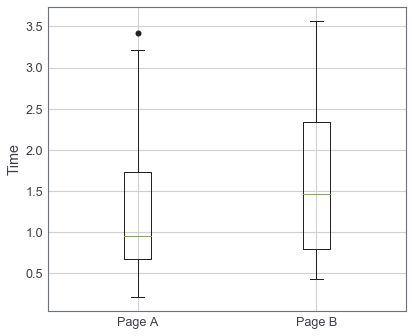

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

from jupyterthemes import jtplot
jtplot.style(theme='grade3')

plt.boxplot(time, sym='k')
plt.xticks(range(1,3), ['Page A', 'Page B'])
plt.ylabel('Time')

In [13]:
import numpy as np

np.mean(timeB) - np.mean(timeA)

0.3566666666666669

In [48]:
def permTest(x, lenA, lenB):
    x = np.random.choice(x, len(x), replace=False)
    xA = x[:lenA]
    xB = x[lenA:]
    return np.mean(xB) - np.mean(xA)

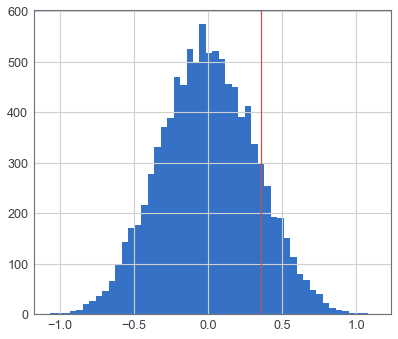

In [49]:
diffMean = []
for iT in range(10000):
    diffMean.append(permTest(np.concatenate((timeA, timeB), axis=None), 
                             len(timeA), len(timeB)))
plt.hist(diffMean, bins=50)
plt.axvline(np.mean(timeB) - np.mean(timeA), color='r')

In [90]:
np.mean(diffMean > np.mean(timeB) - np.mean(timeA))

0.1359

In [94]:
from scipy import stats

stats.ttest_ind(timeA, timeB)

Ttest_indResult(statistic=-1.1237042154424823, pvalue=0.26901024363926024)

In [105]:
timeAB = np.concatenate((timeA, timeB))

norm_mean = np.mean(timeAB)
norm_std = np.std(timeAB)
norm_std_A = norm_std * np.sqrt(len(timeAB)) / np.sqrt(len(timeA))
norm_std_B = norm_std * np.sqrt(len(timeAB)) / np.sqrt(len(timeB))
print(norm_mean, norm_std, norm_std_A, norm_std_B)

modelA = stats.norm(loc=norm_mean, scale=norm_std_A)
modelB = stats.norm(loc=norm_mean, scale=norm_std_B)

diffMean = []
for iT in range(10000):
    meanA = np.mean(modelA.rvs(size=len(timeA)))
    meanB = np.mean(modelB.rvs(size=len(timeB)))
    diffMean.append(meanB - meanA)


1.4119444444444444 0.9292255420642996 1.216641824056007 1.4395500197142366


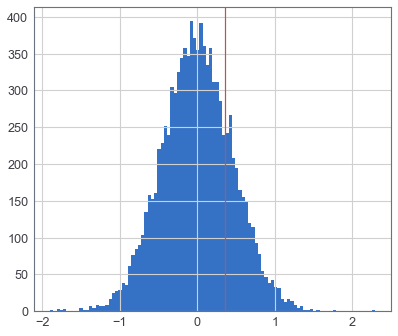

In [103]:
plt.hist(diffMean, bins=100)
plt.axvline(np.mean(timeB) - np.mean(timeA), color='r')

In [104]:
np.mean(diffMean > np.mean(timeB) - np.mean(timeA))

0.2169

# Conversion

In [50]:
df_con = pd.DataFrame(data={'Price A': [200, 23539], 'Price B': [182, 22406]})
df_con.head()

,Price A,Price B
0,200,182
1,23539,22406


In [61]:
priceA = df_con['Price A'].values
priceB = df_con['Price B'].values

In [62]:
rate = df_con.sum(axis=1)[0] / (np.sum(priceA) + np.sum(priceB))
rate

0.008245731430915016

In [66]:
ref_diff = 100 * (priceA[0] / np.sum(priceA) - priceB[0] / np.sum(priceB))
ref_diff

0.03675791182059275

In [70]:
def perm_con(x, len1, len2):
    x = np.random.permutation(x)
    rate1 = x[:len1].tolist().count(1) / len1
    rate2 = x[len1:].tolist().count(1) / len2
    return 100 * (rate1 - rate2)

In [71]:
sample = np.concatenate((np.zeros(priceA[1]+priceB[1]), np.ones(priceA[0]+priceB[0])))
diff = []
for iT in range(10000):
    diff.append(perm_con(sample, np.sum(priceA), np.sum(priceB)))

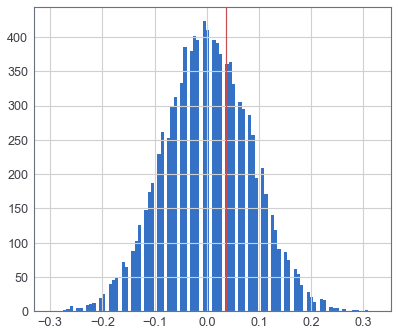

In [78]:
plt.hist(diff, bins=100)
plt.axvline(ref_diff, color='r')

In [79]:
p_value = np.mean(diff > ref_diff)
p_value

0.32

In [87]:
from scipy import stats

nA = np.sum(priceA)
nB = np.sum(priceB)
p = rate

modelA = stats.binom(nA, p)
modelB = stats.binom(nB, p)

diff = []
for iT in range(10000):
    rateA = modelA.rvs() / nA
    rateB = modelB.rvs() / nB
    diff.append(100 * (rateA - rateB))

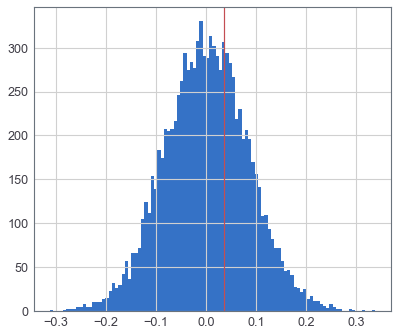

In [88]:
plt.hist(diff, bins=100)
plt.axvline(ref_diff, color='r')

In [89]:
p_value = np.mean(diff > ref_diff)
p_value

0.3365

# Online Sample

In [108]:
df_online = pd.DataFrame(data={"Score 1": [3, 3, 3, 12, 15, 16, 17, 19, 23, 24, 32], 
                               "Score 2": [20,13,13,20, 29, 32, 23, 20, 25, 15, 30]})
df_online.head()

,Score 1,Score 2
0,3,20
1,3,13
2,3,13
3,12,20
4,15,29


In [109]:
stats.ttest_rel(df_online['Score 1'], df_online['Score 2'])

Ttest_relResult(statistic=-2.737328922288368, pvalue=0.02092847795148222)

# Stickness in Web Page

In [110]:
df_stick = pd.DataFrame(data={
    'Page 1': [164, 172, 177, 156, 195],
    'Page 2': [178, 191, 182, 185, 177],
    'Page 3': [175, 193, 171, 163, 176],
    'Page 4': [155, 166, 164, 170, 168]
})
df_stick.head()

,Page 1,Page 2,Page 3,Page 4
0,164,178,175,155
1,172,191,193,166
2,177,182,171,164
3,156,185,163,170
4,195,177,176,168


In [120]:
col_names = df_stick.columns
stick = df_stick.values.transpose() # ???
stick

array([[164, 172, 177, 156, 195],
       [178, 191, 182, 185, 177],
       [175, 193, 171, 163, 176],
       [155, 166, 164, 170, 168]])

{'boxes': [<matplotlib.lines.Line2D at 0x121e66a58>,
 'caps': [<matplotlib.lines.Line2D at 0x121e6b4a8>,
 'fliers': [<matplotlib.lines.Line2D at 0x121e75160>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x121e6bcf8>,
 'whiskers': [<matplotlib.lines.Line2D at 0x121e66ba8>,
  <matplotlib.lines.Line2D at 0x121e98908>]}

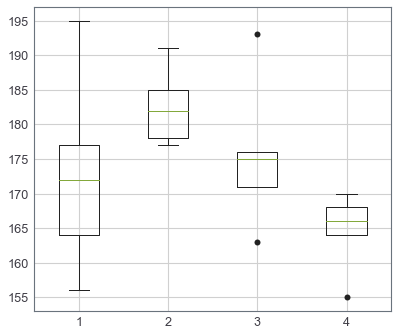

In [122]:
plt.boxplot(stick.tolist(), sym='k')

In [128]:
for i in range(len(col_names)):
    for j in range(i+1, len(col_names)):
        print(i, j, stats.ttest_ind(stick[i], stick[j]))

0 1 Ttest_indResult(statistic=-1.3859292911256307, pvalue=0.20317499853824886)
0 2 Ttest_indResult(statistic=-0.34030136960725227, pvalue=0.7423928129048489)
0 3 Ttest_indResult(statistic=1.156191733258663, pvalue=0.28096106091142226)
1 2 Ttest_indResult(statistic=1.2650143347589609, pvalue=0.24146881279653873)
1 3 Ttest_indResult(statistic=4.950587917224828, pvalue=0.001120056434441126)
2 3 Ttest_indResult(statistic=1.9782125034804172, pvalue=0.08327876770509356)


In [147]:
ref_std = np.std(np.mean(stick, axis=1))
list_std = []
for iT in range(100000):
    tmp_stick = np.random.permutation(stick.ravel()).reshape(stick.shape)
    list_std.append(np.std(np.mean(tmp_stick, axis=1)))

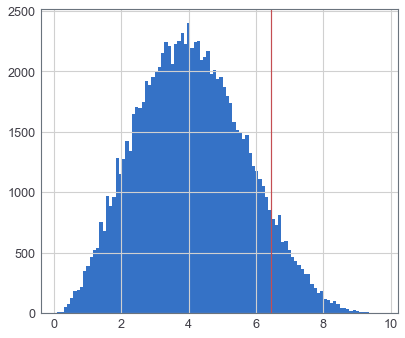

In [148]:
plt.hist(list_std, bins=100)
plt.axvline(ref_std, color='r')

In [149]:
np.mean(list_std > ref_std)

0.07946

In [150]:
stats.f_oneway(stick[0], stick[1], stick[2], stick[3])

F_onewayResult(statistic=2.739825341901467, pvalue=0.0775862152580146)

# Headline

In [151]:
df_headline = pd.DataFrame(data={
    'Headline A': [14, 986],
    'Headline B': [8, 992],
    'Headline C': [12, 988]
})
df_headline.head()

,Headline A,Headline B,Headline C
0,14,8,12
1,986,992,988


In [152]:
headline = df_headline.values
headline

array([[ 14,   8,  12],
       [986, 992, 988]])

In [163]:
def cal_chi2(x):
    sum0 = np.sum(x[0])
    sum1 = np.sum(x[1])
    wCol = np.sum(x, axis=0)
    rate = sum0 / (sum0 + sum1)
    chi2 = 0
    for j in range(len(x[0])):
        chi2 += ((x[0][j]-wCol[j]*rate) / np.sqrt(wCol[j]*rate))**2
        chi2 += ((x[1][j]-wCol[j]*(1-rate)) / np.sqrt(wCol[j]*(1-rate)))**2
    return chi2

In [164]:
cal_chi2(headline)

1.6659394708658914

In [184]:
list_chi2 = []
sample = np.concatenate((np.ones(np.sum(headline[0])), 
                        np.zeros(np.sum(headline[1]))))
for iT in range(10000):
    sample = np.random.permutation(sample)
    cur = 0
    perm_x = []
    for j in range(len(headline[0])):
        length = np.sum(headline, axis=0)[j]
        val1 = sample[cur:cur+length].tolist().count(1)
        val2 = length - val1
        cur += length
        perm_x.append([val1, val2])
    perm_chi2 = cal_chi2(np.array(perm_x).transpose())
    list_chi2.append(perm_chi2)

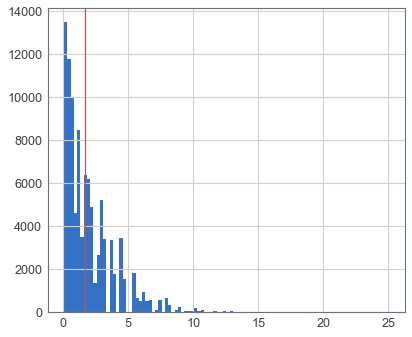

In [185]:
plt.hist(list_chi2, bins=100)
plt.axvline(cal_chi2(headline), color='r')

In [186]:
np.mean(list_chi2 > cal_chi2(headline))

0.45957

In [187]:
stats.chi2_contingency(headline)

(1.6659394708658917,
 0.4347562562343731,
 2,
 array([[ 11.33333333,  11.33333333,  11.33333333],
        [988.66666667, 988.66666667, 988.66666667]]))